In [1]:
import pandas as pd

ABS_PATH = "../Datasets/dataset_TPV_sensors/hex"

payload_hex = pd.read_csv(f"{ABS_PATH}/payloadHex.csv")

In [2]:
payload_hex

,InletPressure,OutletPressure,OutletTemperature,InverterSpeed,Time
0,16.930580,1011.139771,83.308502,4552.0,2023-02-16 02:29:31
1,17.123455,1011.230347,83.308502,4578.0,2023-02-16 02:29:42
2,16.737577,1010.567200,83.383270,4562.0,2023-02-16 02:29:53
3,16.930515,1010.898804,83.308502,4568.0,2023-02-16 02:30:04
4,16.834047,1010.868408,83.383270,4567.0,2023-02-16 02:30:14
...,...,...,...,...,...
92549,94.391632,1059.339111,86.609467,4571.0,2023-03-09 17:18:00
92550,86.288795,1055.028809,86.308472,4574.0,2023-03-09 17:19:01
92551,30.436897,1021.839722,85.256439,4555.0,2023-03-09 17:20:02
92552,84.262955,1057.470825,86.684753,4581.0,2023-03-09 17:21:03


In [3]:
df_filter = payload_hex[payload_hex["InletPressure"] > 1000]#.describe()

In [4]:
#print(df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"], df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"])
first = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[-1]

init_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-02-18 06:20:00 
 2023-02-18 11:51:35


In [5]:
first = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"].index[-1]

init_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-02-27 08:52:08 
 2023-02-27 08:56:50


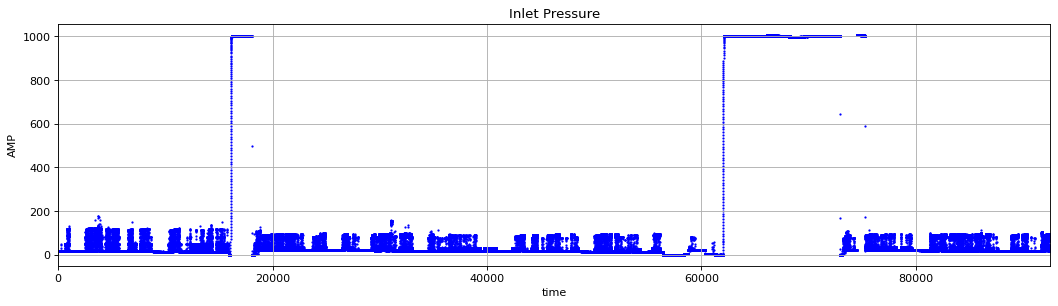

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

x_end = payload_hex["InletPressure"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("Inlet Pressure")
#plt.plot(payload_hex["InletPressure"], color="blue")
plt.scatter(np.arange(len(payload_hex["InletPressure"])), payload_hex["InletPressure"],s= 1, color="blue")
plt.xlabel('time')

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.xlim([0, x_end])
plt.ylabel('AMP')
plt.grid()

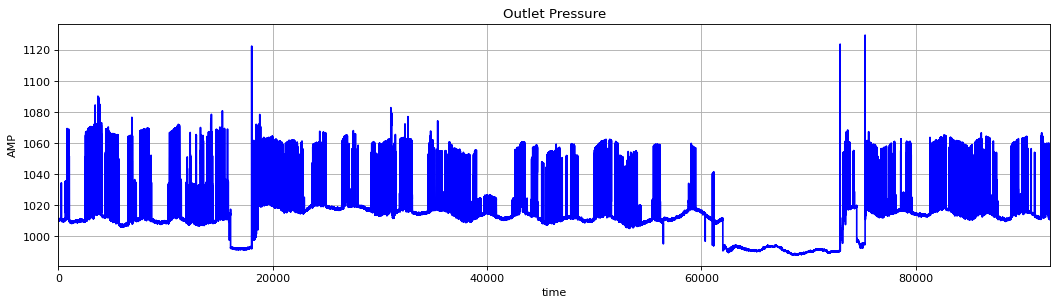

In [7]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

x_end = payload_hex["OutletPressure"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("Outlet Pressure")
plt.plot(payload_hex["OutletPressure"], color="blue")
plt.xlabel('time')
plt.xlim([0, x_end])
plt.ylabel('AMP')
plt.grid()

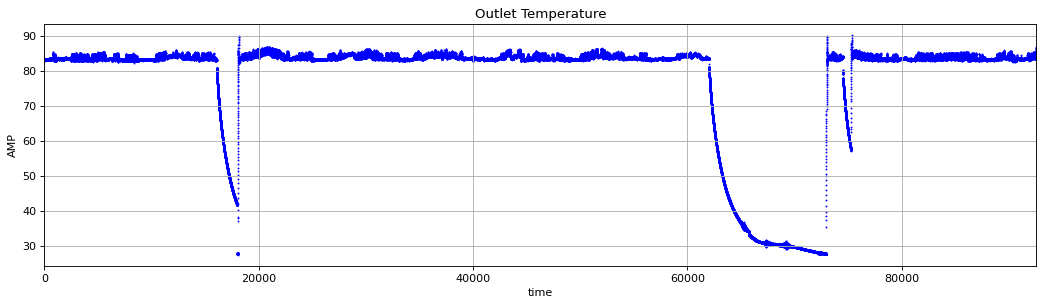

In [8]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

x_end = payload_hex["OutletTemperature"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("Outlet Temperature")
plt.scatter(np.arange(len(payload_hex["InletPressure"])), payload_hex["OutletTemperature"],s=0.5, color="blue")
plt.xlabel('time')
plt.xlim([0, x_end])
plt.ylabel('AMP')
plt.grid()

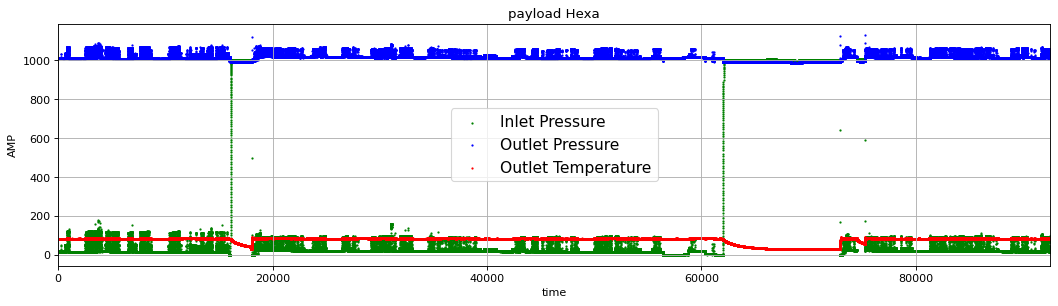

In [9]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

x_end = payload_hex["OutletTemperature"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("payload Hexa")
x = np.arange(len(payload_hex["InletPressure"]))

#plt.scatter(, payload_hex["InletPressure"],s= 1, color="blue")
plt.scatter(x, payload_hex["InletPressure"],s= 1, color="green", label="Inlet Pressure")
plt.scatter(x, payload_hex["OutletPressure"],s= 1, color="blue", label="Outlet Pressure")
plt.scatter(x, payload_hex["OutletTemperature"],s= 1, color="red",label='Outlet Temperature')
plt.legend(loc="upper right")
plt.xlabel('time')
plt.legend(fontsize=14)
plt.xlim([0, x_end])
#plt.xlim([1500, 2000])
plt.ylabel('AMP')
plt.grid()

In [10]:
import pandas as pd

ABS_PATH = "../Datasets/dataset_TPV_sensors"

payload_ite = pd.read_csv(f"{ABS_PATH}/ite/payloadITE.csv")

In [11]:
payload_ite.describe()

,temperature,frequency,phaseA_voltage,phaseA_current,phaseA_pwr_factor,phaseA_active,phaseA_reactive,phaseB_voltage,phaseB_current,phaseB_pwr_factor,phaseB_active,phaseB_reactive,phaseC_voltage,phaseC_current,phaseC_pwr_factor,phaseC_active,phaseC_reactive
count,23159.000000,23159.000000,23159.000000,23159.000000,23159.000000,2.315900e+04,2.315900e+04,23159.000000,23159.000000,23159.000000,2.315900e+04,2.315900e+04,23159.000000,23159.000000,23159.000000,2.315900e+04,2.315900e+04
mean,50.179239,59.951665,227.996831,2.680474,0.639859,1.736447e+09,2.461476e+08,227.896278,2.762783,0.635027,1.821014e+09,2.034880e+08,227.677663,2.694952,0.629214,1.743920e+09,1.559748e+08
std,5.812576,0.050051,8.236706,1.592239,0.360675,2.393503e+08,2.958256e+07,8.774858,1.650419,0.390478,2.487297e+08,2.795985e+07,8.410925,1.611437,0.391910,2.426053e+08,2.104715e+07
min,30.000000,59.800000,198.400000,0.150000,0.040000,1.362168e+09,1.956240e+08,207.600000,0.150000,0.000000,1.431288e+09,1.597680e+08,207.300000,0.150000,-0.010000,1.368000e+09,1.219320e+08
25%,44.000000,59.900000,220.500000,0.150000,0.070000,1.497600e+09,2.164320e+08,219.700000,0.150000,0.010000,1.573416e+09,1.754280e+08,219.900000,0.150000,0.000000,1.502028e+09,1.341000e+08
50%,53.000000,60.000000,225.600000,3.500000,0.860000,1.709460e+09,2.449800e+08,225.800000,3.600000,0.870000,1.792224e+09,2.008440e+08,225.700000,3.550000,0.870000,1.714752e+09,1.555200e+08
75%,54.000000,60.000000,237.300000,3.650000,0.870000,1.985040e+09,2.764800e+08,237.700000,3.800000,0.880000,2.079180e+09,2.327040e+08,237.100000,3.700000,0.890000,1.996416e+09,1.779480e+08
max,59.000000,60.100000,242.600000,5.050000,0.910000,2.213316e+09,3.025440e+08,242.700000,5.400000,0.920000,2.319372e+09,2.572560e+08,242.200000,4.900000,0.920000,2.229012e+09,1.933560e+08


In [12]:
import numpy as np
#from numpy.fft import fft, ifft

signal_fft = np.fft.fft(payload_ite["temperature"])


# signal_ifft = np.fft.ifft(signal_fft)

len_signal = len(signal_fft)

split_signal = 100

signal_fft = signal_fft[:split_signal]

zeros_signal = len_signal - split_signal

signal_filter = np.concatenate((signal_fft, np.zeros(zeros_signal)))

signal_filter = np.fft.ifft(signal_filter)

In [13]:
signal_filter.shape

(23159,)

/home/paim/anaconda3/envs/ocr_estacio/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


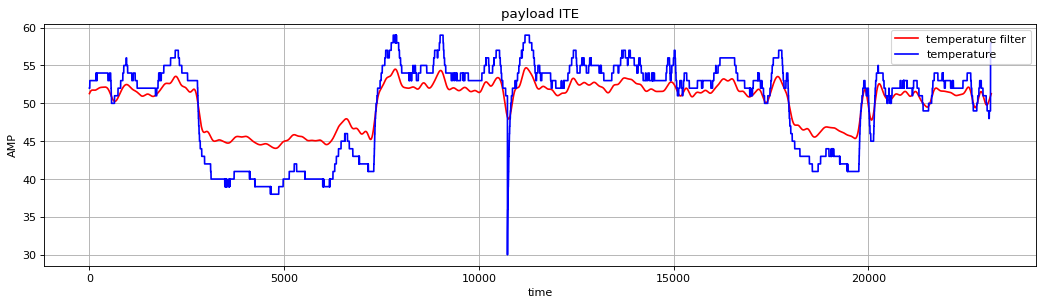

In [14]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

#x_end = payload_ite["temperature"].shape[0]

x_end_arange = np.arange(x_end)
figure(figsize=(16, 4), dpi=80)

plt.title("payload ITE")
plt.plot(signal_filter, color="red", label="temperature filter")
plt.plot(payload_ite["temperature"], color="blue", label="temperature")
plt.legend(loc="upper right")
plt.xlabel('time')
#plt.xlim([0, x_end])
plt.ylabel('AMP')
plt.grid()

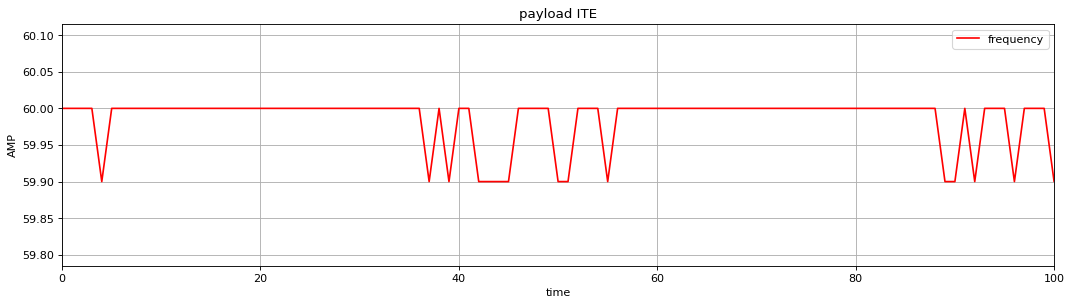

In [15]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

x_end = payload_ite["frequency"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("payload ITE")
plt.plot(payload_ite["frequency"], color="red", label="frequency")
plt.legend(loc="upper right")
plt.xlabel('time')
plt.xlim([0, 100])
plt.ylabel('AMP')
plt.grid()

In [16]:
import pandas as pd

ABS_PATH = "../Datasets/dataset_TPV_sensors"

x_coord = pd.read_csv(f"{ABS_PATH}/wise/x.csv")
y_coord = pd.read_csv(f"{ABS_PATH}/wise/y.csv")
z_coord = pd.read_csv(f"{ABS_PATH}/wise/z.csv")

In [17]:
#print(df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"], df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"])
first = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[-1]

init_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-02-18 06:20:00 
 2023-02-18 11:51:35


In [18]:
z_coord.describe()

,OAVelocity,Peakmg,RMSmg,Kurtosis,CrestFactor,Skewness,Deviation,Peak-to-Peak Displacement
count,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000,11360.000000
mean,147.047535,676.056162,478.503697,1.356690,543.274472,-13.069630,67.772007,9.281690
std,108.541574,519.730459,367.511677,13.849418,96.485963,12.628632,52.197136,6.667539
min,4.000000,5.000000,4.000000,-46.000000,295.000000,-54.000000,0.000000,0.000000
25%,7.000000,5.000000,4.000000,-9.000000,477.000000,-22.000000,0.000000,2.000000
50%,217.000000,994.000000,703.000000,0.000000,546.000000,-10.000000,102.000000,11.000000
75%,228.000000,1076.000000,761.000000,10.000000,610.000000,-3.000000,109.000000,14.000000
max,332.000000,1438.000000,1017.000000,68.000000,919.000000,17.000000,136.000000,46.000000


In [19]:
df_filter = x_coord[x_coord["OAVelocity"] < 10]#.describe()
#

In [20]:
#2023-03-06
first = df_filter[df_filter["Time"].str.contains("2023-03-06")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-03-06")]["Time"].index[-1]


#2023-02-27
init_anomaly = df_filter[df_filter["Time"].str.contains("2023-03-06")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-03-06")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-03-06 00:04:20 
 2023-03-06 08:16:51


In [21]:
first = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"].index[-1]


#2023-02-27
init_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-18")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-02-18 06:02:43 
 2023-02-18 12:25:11


In [22]:
first = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"].index[0]
end = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"].index[-1]


#2023-02-27
init_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"][first]
end_anomaly = df_filter[df_filter["Time"].str.contains("2023-02-27")]["Time"][end]

print(init_anomaly,'\n', end_anomaly)

2023-02-27 00:00:26 
 2023-02-27 08:56:47


In [23]:
import numpy as np

def filter_signal(signal_):

    signal_fft = np.fft.fft(signal_)

    len_signal = len(signal_fft)

    split_signal = 1000

    signal_fft = signal_fft[:split_signal]

    zeros_signal = len_signal - split_signal

    signal_filter = np.concatenate((signal_fft, np.zeros(zeros_signal)))

    signal_filter = np.fft.ifft(signal_filter)
    
    return signal_filter

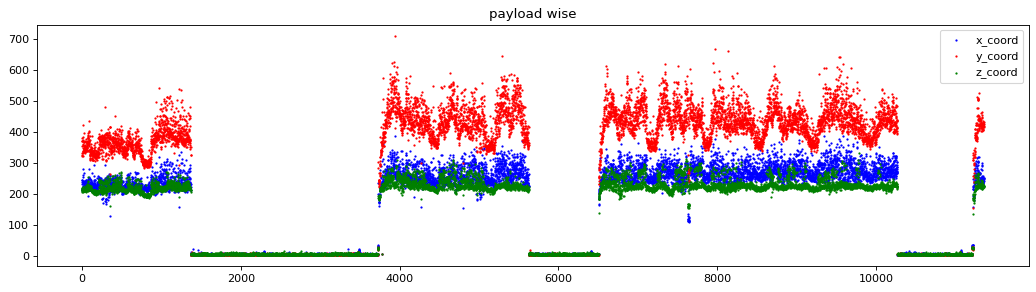

In [24]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# x_end = x_coord["OAVelocity"].shape[0]

figure(figsize=(16, 4), dpi=80)

plt.title("payload wise")
#plt.plot(x_coord["OAVelocity"], color="red", label="x_coord")
#plt.plot(y_coord["OAVelocity"], color="blue", label="y_coord")
#plt.plot(z_coord["OAVelocity"], color="green", label="z_coord")



plt.scatter(np.arange(len(x_coord["OAVelocity"])), x_coord["OAVelocity"],s= 1, color="blue", label="x_coord")
plt.scatter(np.arange(len(x_coord["OAVelocity"])), y_coord["OAVelocity"],s= 1, color="red", label="y_coord")
plt.scatter(np.arange(len(x_coord["OAVelocity"])), z_coord["OAVelocity"],s= 1, color="green", label="z_coord")

x_coord_1 = filter_signal(x_coord["OAVelocity"])
y_coord_1 = filter_signal(y_coord["OAVelocity"])
z_coord_1 = filter_signal(z_coord["OAVelocity"])

# plt.scatter(np.arange(len(x_coord["OAVelocity"])),
#             x_coord,
#             s= 1,
#             color="blue",
#             label="x_coord")

# plt.plot(x_coord_1, color="blue", label="x_coord")
# plt.plot(y_coord_1, color="red", label="y_coord")
# plt.plot(z_coord_1, color="green", label="z_coord")
plt.legend()

# plt.legend(loc="upper right")
# plt.xlabel('time')
# plt.xlim([0, x_end])
# plt.ylabel('AMP')
# plt.grid()

In [25]:
def dow_sampling(data, down_sample_factor = 1):

    # Define the down-sampling factor
    

    # Downsample the data
    down_sampled_data = data[::down_sample_factor]
    
    return down_sampled_data

signal_filter_down = dow_sampling(signal_filter)
signal_filter_down.shape

(23159,)

In [26]:
import pywt

(L, H) = pywt.dwt(signal_filter_down, 'haar')

/home/paim/anaconda3/envs/ocr_estacio/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/paim/anaconda3/envs/ocr_estacio/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


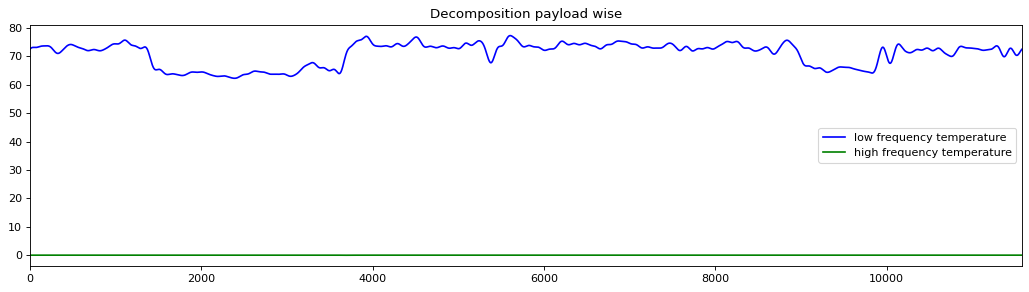

In [28]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure


figure(figsize=(16, 4), dpi=80)

plt.title("Decomposition payload wise")

plt.plot(L, color="blue", label="low frequency temperature")
plt.plot(H, color="green", label="high frequency temperature")
plt.xlim([0, L.shape[0]])
plt.legend()

#### Neural prophet

In [93]:
df = y_coord[["Time", "OAVelocity"]]

x_time = pd.date_range("2018-01-01", periods=df.shape[0],freq="H")

df = pd.DataFrame({'ds': x_time,#pd.to_datetime(df["Time"]),
                   'y': df["OAVelocity"].tolist()})

df = df[~df.ds.duplicated()]

len(df.ds.unique()), len(df.ds), df["y"].shape

# df = df.set_index('ds')

#df = df.resample('D').ffill().reset_index()

df

,ds,y
0,2018-01-01 00:00:00,372
1,2018-01-01 01:00:00,328
2,2018-01-01 02:00:00,380
3,2018-01-01 03:00:00,322
4,2018-01-01 04:00:00,334
...,...,...
11355,2019-04-19 03:00:00,422
11356,2019-04-19 04:00:00,418
11357,2019-04-19 05:00:00,427
11358,2019-04-19 06:00:00,434


In [94]:
from neuralprophet import NeuralProphet

m = NeuralProphet()

metrics = m.fit(df)

WARN - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.991% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 99
WARN - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (178) is too small than the required number for the learning rate finder (251). The results might not be optimal.


Finding best initial lr:   0%|          | 0/251 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [95]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.991% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.991% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 178it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


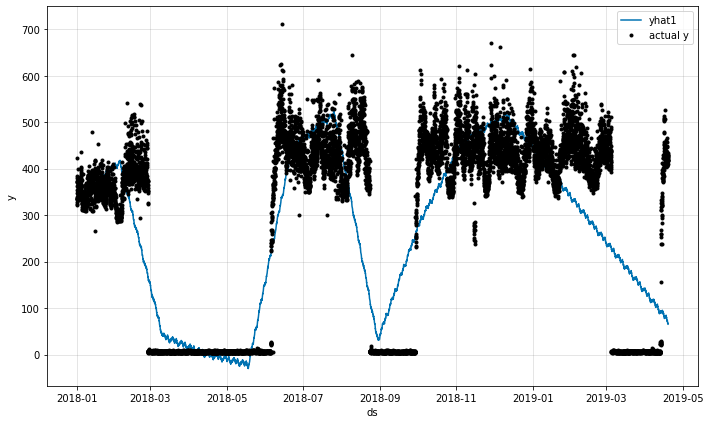

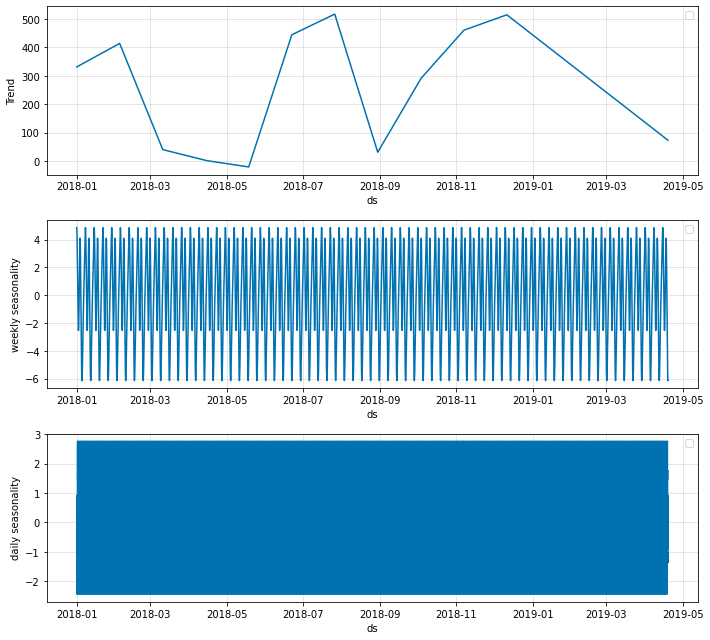

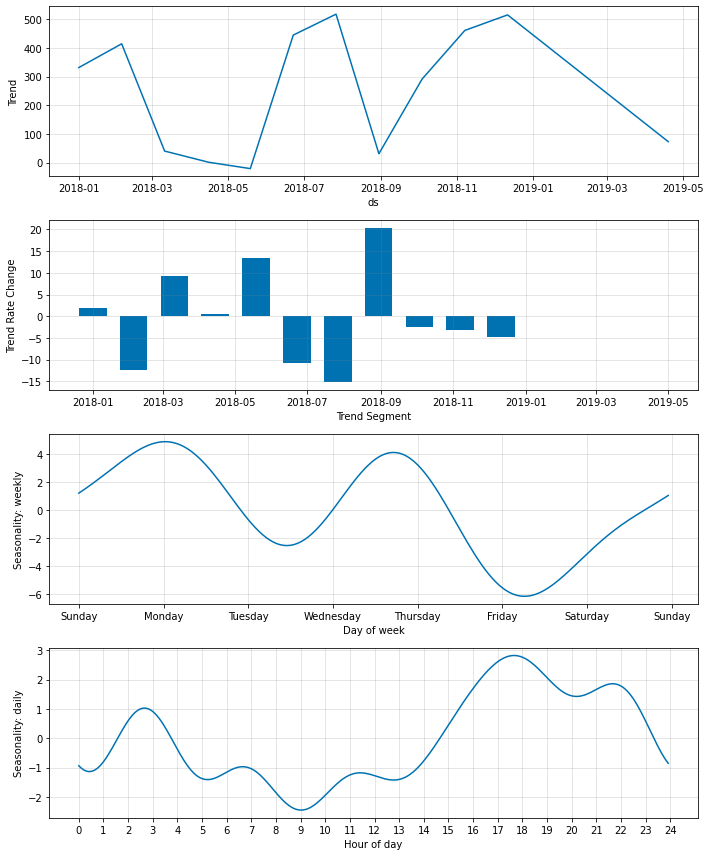

In [96]:
#m.set_plotting_backend('plotly')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()